In [1]:
import torchvision
from torch import nn

import torch
import torch.nn as nn
from dataloaders import load_cifar10
from trainer import Trainer, compute_loss_and_accuracy
from task2 import create_plots, output_features

In [2]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torchvision.models.resnet18(pretrained=True)
        self.model.fc = nn.Linear(512, 10) # No need to apply softmax as this is done in nn.CrossEntropyLoss
            
        for param in self.model.parameters(): # Freeze all parameters
            param.requires_grad = False
        for param in self.model.fc.parameters(): # Unfreeze the last fully-connected
            param.requires_grad = True # layer
        for param in self.model.layer4.parameters(): # Unfreeze the last 5 convolutional
            param.requires_grad = True # layers

    def forward(self, x):
        x = self.model(x)
        return x

In [3]:
epochs = 10
batch_size = 32 #64
learning_rate = 5e-4#5e-2 # Should be 5e-5 for LeNet
early_stop_count = 4
new_mean_std = True
resize = 224
dataloaders = load_cifar10(resize, new_mean_std,'default', batch_size)
#dataloaders = load_cifar10(new_mean_std,'default', batch_size)

l2_reg_lambda = 0.0
optimizer = 'Adam'
model = Model()

trainer = Trainer(batch_size, learning_rate, early_stop_count, epochs, model, dataloaders, l2_reg_lambda, optimizer)

trainer.train()


Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


TypeError: __init__() missing 1 required positional argument: 'optimizer'

In [ ]:
#HorisontalFlip and RandomCrop
epochs = 10
batch_size = 32 #64
learning_rate = 5e-4#5e-2 # Should be 5e-5 for LeNet
early_stop_count = 4
new_mean_std = True
resize = 224
dataloaders = load_cifar10(resize, new_mean_std,'default', batch_size)
#dataloaders = load_cifar10(new_mean_std,'default', batch_size)

l2_reg_lambda = 0.0 #1e-5
optimizer = 'Adam'
model = Model()

trainer = Trainer(batch_size, learning_rate, early_stop_count, epochs, model, dataloaders, l2_reg_lambda, optimizer)

trainer.train()

Files already downloaded and verified
Files already downloaded and verified
Model(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      

In [ ]:
# ONLY Horisontal flip
epochs = 10
batch_size = 32 #64
learning_rate = 5e-4#5e-2 # Should be 5e-5 for LeNet
early_stop_count = 4
new_mean_std = True
resize = 224
dataloaders = load_cifar10(resize, new_mean_std,'default', batch_size)
#dataloaders = load_cifar10(new_mean_std,'default', batch_size)

l2_reg_lambda = 0.0 #1e-5
optimizer = 'Adam'
model = Model()

trainer = Trainer(batch_size, learning_rate, early_stop_count, epochs, model, dataloaders, l2_reg_lambda, optimizer)

trainer.train()


Files already downloaded and verified
Files already downloaded and verified
Model(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      

In [8]:
# ONLY Horisontal flip with dic
epochs = 10
batch_size = 32 #64
learning_rate = 5e-4#5e-2 # Should be 5e-5 for LeNet
early_stop_count = 4
new_mean_std = True
resize = 224
dataloaders = load_cifar10(resize, new_mean_std,'flip', batch_size)
#dataloaders = load_cifar10(new_mean_std,'default', batch_size)

l2_reg_lambda = 0.0 #1e-5
optimizer = 'Adam'
model = Model()

trainer = Trainer(batch_size, learning_rate, early_stop_count, epochs, model, dataloaders, l2_reg_lambda, optimizer)

trainer.train()

Files already downloaded and verified
Files already downloaded and verified


TypeError: __init__() missing 1 required positional argument: 'optimizer'

In [7]:
# ONLY Horisontal flip with dic with L2
epochs = 10
batch_size = 32 #64
learning_rate = 5e-4#5e-2 # Should be 5e-5 for LeNet
early_stop_count = 10
new_mean_std = True
resize = 224
dataloaders = load_cifar10(resize, new_mean_std,'flip', batch_size)
#dataloaders = load_cifar10(new_mean_std,'default', batch_size)

l2_reg_lambda = 1e-5 #0.0
optimizer = 'Adam'
model = Model()

trainer = Trainer(batch_size, learning_rate, early_stop_count, epochs, model, dataloaders, l2_reg_lambda, optimizer)

trainer.train()

Files already downloaded and verified
Files already downloaded and verified
Model(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      

In [3]:
# ONLY Horisontal flip with dic NEW
epochs = 10
batch_size = 32 #64
learning_rate = 5e-4#5e-2 # Should be 5e-5 for LeNet
early_stop_count = 4
new_mean_std = True
resize = 224
dataloaders = load_cifar10(resize, new_mean_std,'flip', batch_size)
#dataloaders = load_cifar10(new_mean_std,'default', batch_size)

l2_reg_lambda = 0.005 #1e-5
momentum = 0
optimizer = 'Adam'
model = Model()

trainer = Trainer(batch_size, learning_rate, early_stop_count, epochs, model, dataloaders, l2_reg_lambda, momentum, optimizer)

trainer.train()

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\vemun/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:07<00:00, 6.50MB/s]


Model(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

In [6]:
#With momentum and new alpha 
epochs = 10
batch_size = 32 #64
learning_rate = 5e-4#5e-2 # Should be 5e-5 for LeNet
early_stop_count = 4
new_mean_std = True
resize = 224
dataloaders = load_cifar10(resize, new_mean_std,'flip', batch_size)
#dataloaders = load_cifar10(new_mean_std,'default', batch_size)

l2_reg_lambda = 0.0 #1e-5
momentum = 0.02
optimizer = 'Adam'
model = Model()

trainer = Trainer(batch_size, learning_rate, early_stop_count, epochs, model, dataloaders, l2_reg_lambda, momentum, optimizer)

trainer.train()

Files already downloaded and verified
Files already downloaded and verified
Model(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      

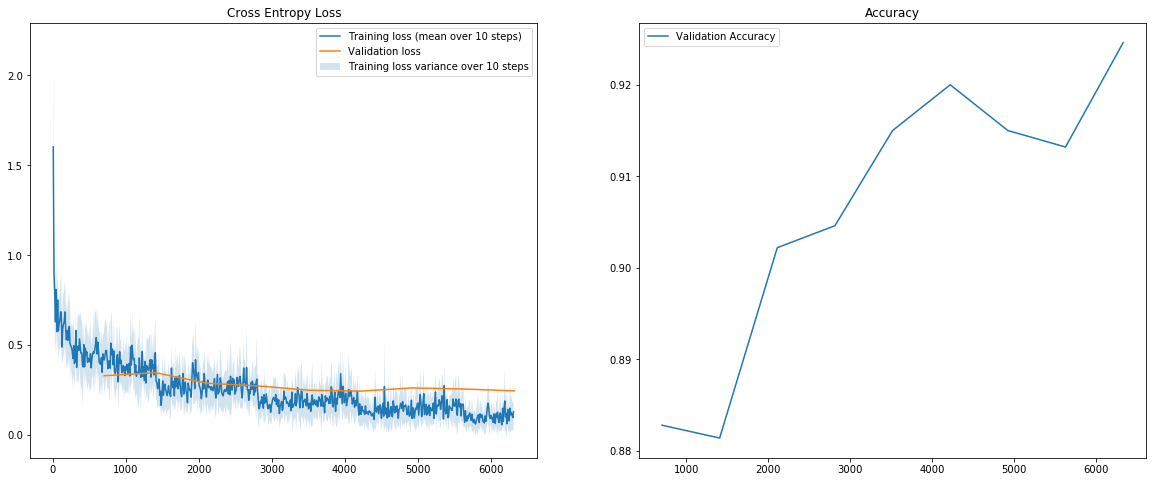

In [7]:
create_plots(trainer, "task4")